<a href="https://colab.research.google.com/github/FaysArukattil/ICT-ML/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas
import pandas as pd
import numpy as np

In [97]:
from google.colab import files
files.upload()

Saving sal.csv to sal (1).csv


{'sal (1).csv': b'Experience,Salary\r\n1.1,39343\r\n1.3,46205\r\n1.5,37731\r\n2,43525\r\n2.2,39891\r\n2.9,56642\r\n3,60150\r\n3.2,54445\r\n3.2,64445\r\n3.7,57189\r\n3.9,63218\r\n4,55794\r\n4,56957\r\n4.1,57081\r\n4.5,61111\r\n4.9,67938\r\n5.1,66029\r\n5.3,83088\r\n5.9,81363\r\n6,93940\r\n6.8,91738\r\n7.1,98273\r\n7.9,101302\r\n8.2,113812\r\n8.7,109431\r\n9,105582\r\n9.5,116969\r\n9.6,112635\r\n10.3,122391\r\n10.5,121872\r\n'}

In [98]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('sal.csv', index_col=0)

# display the first 5 rows
data.head(10)

,Salary
Experience,
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642
3.0,60150
3.2,54445
3.2,64445


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [99]:
# display the last 5 rows
data.tail()

,Salary
Experience,
9.0,105582
9.5,116969
9.6,112635
10.3,122391
10.5,121872


In [104]:
# check the shape of the DataFrame (rows, columns)
data.shape
data.reset_index(inplace=True)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data


In [101]:
# conventional way to import seaborn
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline



<Axes: xlabel='Experience', ylabel='Salary'>

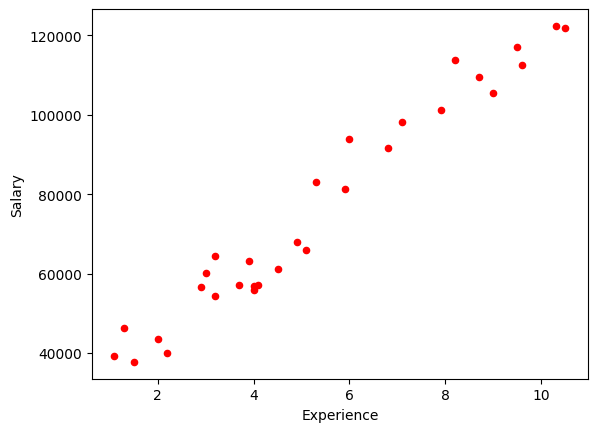

In [106]:
data.plot(kind='scatter',x='Experience',y='Salary',color='red')


## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [107]:
# create a Python list of feature names
feature_cols = ['Experience']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
#X = data[['TV','Radio','Newspaper']]

# print the first 5 rows
X.head()


,Experience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [108]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(30, 1)


In [110]:
# select a Series from the DataFrame
lab = ['Salary']

# equivalent command that works if there are no spaces in the column name
y =  data['Salary']



# print the first 5 values
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [111]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(30,)


## Splitting X and y into training and testing sets

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [113]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_train = X_train[:150]

print(X_test)

(22, 1)
(22,)
(8, 1)
(8,)
    Experience
17         5.3
21         7.1
10         3.9
19         6.0
14         4.5
20         6.8
26         9.5
3          2.0


## Linear regression in scikit-learn

In [114]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
model = linreg.fit(X_train, y_train)



### Making predictions

In [115]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)



[ 74978.61852009  91649.44173553  62012.42268586  81461.7164372
  67569.36375767  88870.97119962 113877.20602278  44415.44262512]


We need an **evaluation metric** in order to compare our predictions with the actual values!